# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [3]:
import logging
logging.basicConfig(level=logging.DEBUG)

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

571

In [5]:
cities

['avarua',
 'teya',
 'portland',
 'rikitea',
 'thinadhoo',
 'busselton',
 'albany',
 'uyuni',
 'hunza',
 'tuktoyaktuk',
 'gerede',
 'longido',
 'pachperwa',
 'san carlos de bariloche',
 'iqaluit',
 'chapleau',
 'coihaique',
 'umba',
 'puerto ayora',
 'kodiak',
 'east london',
 'talnakh',
 'sur',
 'cherskiy',
 'guerrero negro',
 'ancud',
 'port alfred',
 'atuona',
 'bredasdorp',
 'ushuaia',
 'illoqqortoormiut',
 'mataura',
 'nome',
 'vaini',
 'hermanus',
 'georgetown',
 'khandyga',
 'burica',
 'dunedin',
 'rocha',
 'bluff',
 'russell',
 'puerto ayacucho',
 'qaanaaq',
 'baykit',
 'auki',
 'tasiilaq',
 'samusu',
 'cape town',
 'caravelas',
 'nyurba',
 'kushima',
 'fortuna',
 'alofi',
 'nouakchott',
 'menongue',
 'bhuj',
 'fairbanks',
 'kargil',
 'arraial do cabo',
 'sisimiut',
 'salalah',
 'cidreira',
 'butaritari',
 'hobart',
 'traverse city',
 'banda aceh',
 'mar del plata',
 'norman wells',
 'vestmannaeyjar',
 'belmonte',
 'castro',
 'barbar',
 'aranda de duero',
 'guanica',
 'luderitz

In [6]:
#save it into csv

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [7]:
# api.openweathermap.org/data/2.5/weather?q={city name}&appid={API key}
url = "https://api.openweathermap.org/data/2.5/weather?units=imperial&"

city = "beibei"
query_url = url + "q=" + city + "&appid=" + weather_api_key
response = requests.get(query_url).json()
response

DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443
DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=beibei&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 470


{'coord': {'lon': 106.4339, 'lat': 29.8256},
 'weather': [{'id': 802,
   'main': 'Clouds',
   'description': 'scattered clouds',
   'icon': '03n'}],
 'base': 'stations',
 'main': {'temp': 49.12,
  'feels_like': 47.98,
  'temp_min': 48.2,
  'temp_max': 50,
  'pressure': 1023,
  'humidity': 93},
 'visibility': 10000,
 'wind': {'speed': 0.87, 'deg': 279},
 'clouds': {'all': 40},
 'dt': 1614726493,
 'sys': {'type': 1,
  'id': 9673,
  'country': 'CN',
  'sunrise': 1614727101,
  'sunset': 1614768868},
 'timezone': 28800,
 'id': 1816790,
 'name': 'Beibei',
 'cod': 200}

In [8]:
response["coord"]["lat"]

29.8256

In [9]:
weather_dict = {
'Lat':[],
'Lng':[],
'MaxTemp':[],
'Humidity':[],
'Cloudiness':[],
'WindSpeed':[],
'Country':[],
'Date':[]
}

print("Beginning Data Retrieval")
print("-----------------------------")

Record = 0
Set = 1
for c in cities:
   
    Record = Record + 1
    if Record % 50 == 0 :
        Record = 0
        Set = Set + 1
        
    try:
        query_url = url + "q=" + c + "&appid=" + weather_api_key
        response = requests.get(query_url).json()
        print(f"Processing Record {Record}  of Set {Set} | {c}.")

        weather_dict["Lat"].append(response["coord"]["lat"])
        weather_dict["Lng"].append(response["coord"]["lon"])
        weather_dict["MaxTemp"].append(response["main"]["temp_max"])
        weather_dict["Humidity"].append(response["main"]["humidity"])
        weather_dict["Cloudiness"].append(response["clouds"]["all"])
        weather_dict["WindSpeed"].append(response["wind"]["speed"])
        weather_dict["Country"].append(response["sys"]["country"])
        weather_dict["Date"].append(response["dt"])
    except:
        print("City not found. Skipping...")
        
print("-----------------------------")
print("Data Retrieval Complete")      
print("-----------------------------")        
    



DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Beginning Data Retrieval
-----------------------------


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=avarua&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 469
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 1  of Set 1 | avarua.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=teya&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 492
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 2  of Set 1 | teya.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=portland&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 475
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 3  of Set 1 | portland.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=rikitea&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 491
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 4  of Set 1 | rikitea.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=thinadhoo&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 485
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 5  of Set 1 | thinadhoo.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=busselton&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 497
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 6  of Set 1 | busselton.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=albany&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 464
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 7  of Set 1 | albany.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=uyuni&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 486
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 8  of Set 1 | uyuni.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=hunza&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 404 40
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 9  of Set 1 | hunza.
City not found. Skipping...


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=tuktoyaktuk&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 478
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 10  of Set 1 | tuktoyaktuk.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=gerede&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 496
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 11  of Set 1 | gerede.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=longido&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 487
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 12  of Set 1 | longido.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=pachperwa&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 479
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 13  of Set 1 | pachperwa.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=san%20carlos%20de%20bariloche&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 471
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 14  of Set 1 | san carlos de bariloche.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=iqaluit&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 462
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 15  of Set 1 | iqaluit.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=chapleau&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 492
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 16  of Set 1 | chapleau.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=coihaique&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 473
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 17  of Set 1 | coihaique.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=umba&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 476
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 18  of Set 1 | umba.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=puerto%20ayora&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 493
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 19  of Set 1 | puerto ayora.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=kodiak&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 480
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 20  of Set 1 | kodiak.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=east%20london&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 503
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 21  of Set 1 | east london.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=talnakh&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 485
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 22  of Set 1 | talnakh.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=sur&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 487
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 23  of Set 1 | sur.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=cherskiy&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 487
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 24  of Set 1 | cherskiy.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=guerrero%20negro&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 492
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 25  of Set 1 | guerrero negro.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=ancud&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 461
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 26  of Set 1 | ancud.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=port%20alfred&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 479
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 27  of Set 1 | port alfred.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=atuona&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 492
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 28  of Set 1 | atuona.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=bredasdorp&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 472
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 29  of Set 1 | bredasdorp.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=ushuaia&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 467
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 30  of Set 1 | ushuaia.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=illoqqortoormiut&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 404 40
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 31  of Set 1 | illoqqortoormiut.
City not found. Skipping...


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=mataura&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 483
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 32  of Set 1 | mataura.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=nome&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 452
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 33  of Set 1 | nome.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=vaini&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 476
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 34  of Set 1 | vaini.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=hermanus&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 469
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 35  of Set 1 | hermanus.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=georgetown&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 472
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 36  of Set 1 | georgetown.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=khandyga&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 491
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 37  of Set 1 | khandyga.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=burica&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 404 40
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 38  of Set 1 | burica.
City not found. Skipping...


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=dunedin&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 479
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 39  of Set 1 | dunedin.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=rocha&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 493
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 40  of Set 1 | rocha.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=bluff&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 469
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 41  of Set 1 | bluff.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=russell&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 487
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 42  of Set 1 | russell.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=puerto%20ayacucho&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 493
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 43  of Set 1 | puerto ayacucho.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=qaanaaq&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 500
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 44  of Set 1 | qaanaaq.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=baykit&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 478
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 45  of Set 1 | baykit.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=auki&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 499
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 46  of Set 1 | auki.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=tasiilaq&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 483
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 47  of Set 1 | tasiilaq.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=samusu&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 404 40
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 48  of Set 1 | samusu.
City not found. Skipping...


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=cape%20town&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 458
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 49  of Set 1 | cape town.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=caravelas&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 495
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 0  of Set 2 | caravelas.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=nyurba&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 490
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 1  of Set 2 | nyurba.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=kushima&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 465
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 2  of Set 2 | kushima.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=fortuna&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 489
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 3  of Set 2 | fortuna.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=alofi&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 484
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 4  of Set 2 | alofi.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=nouakchott&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 457
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 5  of Set 2 | nouakchott.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=menongue&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 489
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 6  of Set 2 | menongue.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=bhuj&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 479
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 7  of Set 2 | bhuj.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=fairbanks&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 468
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 8  of Set 2 | fairbanks.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=kargil&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 481
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 9  of Set 2 | kargil.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=arraial%20do%20cabo&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 498
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 10  of Set 2 | arraial do cabo.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=sisimiut&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 492
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 11  of Set 2 | sisimiut.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=salalah&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 470
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 12  of Set 2 | salalah.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=cidreira&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 489
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 13  of Set 2 | cidreira.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=butaritari&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 483
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 14  of Set 2 | butaritari.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=hobart&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 469
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 15  of Set 2 | hobart.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=traverse%20city&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 489
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 16  of Set 2 | traverse city.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=banda%20aceh&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 481
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 17  of Set 2 | banda aceh.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=mar%20del%20plata&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 463
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 18  of Set 2 | mar del plata.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=norman%20wells&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 473
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 19  of Set 2 | norman wells.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=vestmannaeyjar&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 458
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 20  of Set 2 | vestmannaeyjar.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=belmonte&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 468
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 21  of Set 2 | belmonte.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=castro&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 489
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 22  of Set 2 | castro.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=barbar&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 404 40
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 23  of Set 2 | barbar.
City not found. Skipping...


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=aranda%20de%20duero&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 487
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 24  of Set 2 | aranda de duero.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=guanica&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 478
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 25  of Set 2 | guanica.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=luderitz&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 497
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 26  of Set 2 | luderitz.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=college&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 467
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 27  of Set 2 | college.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=nikolskoye&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 467
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 28  of Set 2 | nikolskoye.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=barquisimeto&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 471
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 29  of Set 2 | barquisimeto.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=grobina&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 466
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 30  of Set 2 | grobina.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=taolanaro&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 404 40
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 31  of Set 2 | taolanaro.
City not found. Skipping...


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=carnarvon&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 472
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 32  of Set 2 | carnarvon.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=thompson&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 462
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 33  of Set 2 | thompson.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=dikson&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 484
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 34  of Set 2 | dikson.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=jamestown&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 465
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 35  of Set 2 | jamestown.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=salym&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 484
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 36  of Set 2 | salym.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=amderma&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 404 40
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 37  of Set 2 | amderma.
City not found. Skipping...


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=gouyave&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 459
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 38  of Set 2 | gouyave.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=lac%20du%20bonnet&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 494
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 39  of Set 2 | lac du bonnet.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=beidao&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 497
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 40  of Set 2 | beidao.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=caibarien&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 469
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 41  of Set 2 | caibarien.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=hithadhoo&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 496
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 42  of Set 2 | hithadhoo.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=saint-philippe&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 464
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 43  of Set 2 | saint-philippe.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=karratha&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 490
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 44  of Set 2 | karratha.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=vernon&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 471
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 45  of Set 2 | vernon.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=bambous%20virieux&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 479
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 46  of Set 2 | bambous virieux.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=lebu&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 485
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 47  of Set 2 | lebu.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=vaitupu&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 404 40
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 48  of Set 2 | vaitupu.
City not found. Skipping...


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=grindavik&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 461
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 49  of Set 2 | grindavik.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=janesville&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 480
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 0  of Set 3 | janesville.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=kungurtug&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 489
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 1  of Set 3 | kungurtug.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=bandiagara&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 478
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 2  of Set 3 | bandiagara.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=bundaberg&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 472
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 3  of Set 3 | bundaberg.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=punta%20arenas&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 469
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 4  of Set 3 | punta arenas.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=puerto%20escondido&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 480
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 5  of Set 3 | puerto escondido.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=gusau&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 482
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 6  of Set 3 | gusau.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=airai&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 499
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 7  of Set 3 | airai.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=barrow&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 482
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 8  of Set 3 | barrow.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=chuy&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 491
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 9  of Set 3 | chuy.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=aklavik&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 476
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 10  of Set 3 | aklavik.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=cockburn%20town&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 469
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 11  of Set 3 | cockburn town.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=lakefield&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 468
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 12  of Set 3 | lakefield.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=somerset&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 465
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 13  of Set 3 | somerset.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=yialos&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 404 40
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 14  of Set 3 | yialos.
City not found. Skipping...


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=ahipara&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 505
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 15  of Set 3 | ahipara.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=akdepe&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 468
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 16  of Set 3 | akdepe.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=longyearbyen&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 464
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 17  of Set 3 | longyearbyen.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=pontianak&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 459
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 18  of Set 3 | pontianak.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=kapaa&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 484
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 19  of Set 3 | kapaa.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=kavaratti&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 483
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 20  of Set 3 | kavaratti.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=arnes&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 456
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 21  of Set 3 | arnes.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=josanicka%20banja&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 468
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 22  of Set 3 | josanicka banja.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=angoche&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 490
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 23  of Set 3 | angoche.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=polovinnoye&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 490
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 24  of Set 3 | polovinnoye.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=dingle&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 512
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 25  of Set 3 | dingle.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=saint%20george&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 479
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 26  of Set 3 | saint george.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=new%20norfolk&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 485
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 27  of Set 3 | new norfolk.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=kavieng&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 515
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 28  of Set 3 | kavieng.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=port%20macquarie&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 473
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 29  of Set 3 | port macquarie.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=turtkul&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 404 40
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 30  of Set 3 | turtkul.
City not found. Skipping...


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=marcona&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 404 40
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 31  of Set 3 | marcona.
City not found. Skipping...


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=north%20platte&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 472
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 32  of Set 3 | north platte.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=eurajoki&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 458
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 33  of Set 3 | eurajoki.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=camopi&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 487
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 34  of Set 3 | camopi.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=pisco&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 468
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 35  of Set 3 | pisco.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=caramay&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 486
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 36  of Set 3 | caramay.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=saldanha&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 463
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 37  of Set 3 | saldanha.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=codrington&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 495
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 38  of Set 3 | codrington.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=morehead&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 462
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 39  of Set 3 | morehead.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=sabang&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 481
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 40  of Set 3 | sabang.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=victoria&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 488
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 41  of Set 3 | victoria.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=port-gentil&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 496
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 42  of Set 3 | port-gentil.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=san%20luis&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 471
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 43  of Set 3 | san luis.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=lavrentiya&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 489
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 44  of Set 3 | lavrentiya.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=kerema&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 489
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 45  of Set 3 | kerema.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=kahului&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 481
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 46  of Set 3 | kahului.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=madang&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 497
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 47  of Set 3 | madang.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=hilo&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 478
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 48  of Set 3 | hilo.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=madukkur&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 478
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 49  of Set 3 | madukkur.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=margate&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 469
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 0  of Set 4 | margate.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=severo-kurilsk&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 510
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 1  of Set 4 | severo-kurilsk.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=mesyagutovo&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 492
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 2  of Set 4 | mesyagutovo.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=bajo%20baudo&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 404 40
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 3  of Set 4 | bajo baudo.
City not found. Skipping...


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=khatanga&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 482
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 4  of Set 4 | khatanga.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=goderich&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 478
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 5  of Set 4 | goderich.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=sao%20joao%20da%20barra&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 505
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 6  of Set 4 | sao joao da barra.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=brownsville&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 488
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 7  of Set 4 | brownsville.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=isangel&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 459
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 8  of Set 4 | isangel.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=sitka&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 478
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 9  of Set 4 | sitka.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=havoysund&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 477
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 10  of Set 4 | havoysund.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=ribeira%20grande&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 506
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 11  of Set 4 | ribeira grande.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=berlevag&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 470
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 12  of Set 4 | berlevag.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=yellowknife&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 462
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 13  of Set 4 | yellowknife.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=rungata&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 404 40
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 14  of Set 4 | rungata.
City not found. Skipping...


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=baherden&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 480
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 15  of Set 4 | baherden.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=waipawa&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 484
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 16  of Set 4 | waipawa.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=half%20moon%20bay&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 466
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 17  of Set 4 | half moon bay.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=nanortalik&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 483
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 18  of Set 4 | nanortalik.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=barentsburg&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 404 40
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 19  of Set 4 | barentsburg.
City not found. Skipping...


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=kamiiso&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 470
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 20  of Set 4 | kamiiso.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=marienburg&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 472
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 21  of Set 4 | marienburg.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=umzimvubu&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 404 40
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 22  of Set 4 | umzimvubu.
City not found. Skipping...


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=klaksvik&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 466
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 23  of Set 4 | klaksvik.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=mpika&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 485
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 24  of Set 4 | mpika.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=sentyabrskiy&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 404 40
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 25  of Set 4 | sentyabrskiy.
City not found. Skipping...


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=udachnyy&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 488
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 26  of Set 4 | udachnyy.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=moba&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 487
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 27  of Set 4 | moba.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=rio%20grande&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 474
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 28  of Set 4 | rio grande.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=tuatapere&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 485
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 29  of Set 4 | tuatapere.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=osypenko&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 478
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 30  of Set 4 | osypenko.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=upernavik&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 505
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 31  of Set 4 | upernavik.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=toliary&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 404 40
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 32  of Set 4 | toliary.
City not found. Skipping...


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=skjervoy&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 501
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 33  of Set 4 | skjervoy.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=kaitangata&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 467
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 34  of Set 4 | kaitangata.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=bontang&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 487
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 35  of Set 4 | bontang.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=lasa&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 459
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 36  of Set 4 | lasa.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=cabo%20san%20lucas&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 480
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 37  of Set 4 | cabo san lucas.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=colares&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 460
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 38  of Set 4 | colares.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=teeli&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 482
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 39  of Set 4 | teeli.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=trofors&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 492
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 40  of Set 4 | trofors.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=rincon&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 490
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 41  of Set 4 | rincon.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=mahebourg&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 468
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 42  of Set 4 | mahebourg.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=temaraia&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 404 40
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 43  of Set 4 | temaraia.
City not found. Skipping...


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=torrington&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 480
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 44  of Set 4 | torrington.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=umm%20durman&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 404 40
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 45  of Set 4 | umm durman.
City not found. Skipping...


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=pangody&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 509
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 46  of Set 4 | pangody.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=makakilo%20city&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 492
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 47  of Set 4 | makakilo city.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=lom%20sak&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 479
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 48  of Set 4 | lom sak.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=dibaya&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 404 40
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 49  of Set 4 | dibaya.
City not found. Skipping...


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=carroll&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 480
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 0  of Set 5 | carroll.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=vardo&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 463
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 1  of Set 5 | vardo.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=yar-sale&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 509
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 2  of Set 5 | yar-sale.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=tutoia&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 484
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 3  of Set 5 | tutoia.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=provideniya&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 467
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 4  of Set 5 | provideniya.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=hvolsvollur&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 458
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 5  of Set 5 | hvolsvollur.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=rawson&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 492
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 6  of Set 5 | rawson.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=lompoc&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 464
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 7  of Set 5 | lompoc.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=sagua%20de%20tanamo&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 490
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 8  of Set 5 | sagua de tanamo.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=moree&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 465
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 9  of Set 5 | moree.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=dover&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 462
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 10  of Set 5 | dover.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=tir%20pol&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 404 40
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 11  of Set 5 | tir pol.
City not found. Skipping...


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=port%20elizabeth&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 464
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 12  of Set 5 | port elizabeth.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=grand%20river%20south%20east&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 404 40
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 13  of Set 5 | grand river south east.
City not found. Skipping...


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=gumdag&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 478
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 14  of Set 5 | gumdag.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=batagay-alyta&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 497
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 15  of Set 5 | batagay-alyta.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=meulaboh&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 486
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 16  of Set 5 | meulaboh.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=lodingen&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 482
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 17  of Set 5 | lodingen.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=chokurdakh&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 507
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 18  of Set 5 | chokurdakh.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=havre&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 474
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 19  of Set 5 | havre.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=seoul&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 461
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 20  of Set 5 | seoul.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=esperance&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 484
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 21  of Set 5 | esperance.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=verkhoyansk&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 493
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 22  of Set 5 | verkhoyansk.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=souillac&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 483
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 23  of Set 5 | souillac.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=itoman&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 465
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 24  of Set 5 | itoman.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=qaqortoq&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 481
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 25  of Set 5 | qaqortoq.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=karkaralinsk&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 404 40
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 26  of Set 5 | karkaralinsk.
City not found. Skipping...


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=port%20augusta&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 473
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 27  of Set 5 | port augusta.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=manicore&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 505
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 28  of Set 5 | manicore.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=kyra&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 482
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 29  of Set 5 | kyra.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=bambanglipuro&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 505
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 30  of Set 5 | bambanglipuro.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=leningradskiy&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 497
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 31  of Set 5 | leningradskiy.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=sidi%20ali&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 484
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 32  of Set 5 | sidi ali.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=zadar&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 458
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 33  of Set 5 | zadar.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=hamilton&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 464
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 34  of Set 5 | hamilton.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=san%20cristobal&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 476
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 35  of Set 5 | san cristobal.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=mehriz&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 460
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 36  of Set 5 | mehriz.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=buchanan&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 481
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 37  of Set 5 | buchanan.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=katsuura&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 468
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 38  of Set 5 | katsuura.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=bengkulu&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 490
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 39  of Set 5 | bengkulu.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=potosi&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 490
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 40  of Set 5 | potosi.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=ponta%20do%20sol&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 483
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 41  of Set 5 | ponta do sol.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=garavuti&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 466
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 42  of Set 5 | garavuti.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=saskylakh&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 496
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 43  of Set 5 | saskylakh.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=zhigansk&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 496
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 44  of Set 5 | zhigansk.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=ginda&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 477
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 45  of Set 5 | ginda.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=petropavlovsk-kamchatskiy&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 497
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 46  of Set 5 | petropavlovsk-kamchatskiy.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=mende&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 497
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 47  of Set 5 | mende.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=tulun&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 497
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 48  of Set 5 | tulun.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=labuhan&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 490
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 49  of Set 5 | labuhan.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=gamboula&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 486
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 0  of Set 6 | gamboula.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=inhambane&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 503
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 1  of Set 6 | inhambane.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=padang&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 470
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 2  of Set 6 | padang.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=hovd&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 500
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 3  of Set 6 | hovd.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=izumo&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 467
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 4  of Set 6 | izumo.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=zarautz&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 456
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 5  of Set 6 | zarautz.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=fort%20frances&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 470
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 6  of Set 6 | fort frances.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=palabuhanratu&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 404 40
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 7  of Set 6 | palabuhanratu.
City not found. Skipping...


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=bossangoa&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 488
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 8  of Set 6 | bossangoa.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=glendive&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 469
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 9  of Set 6 | glendive.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=hami&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 472
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 10  of Set 6 | hami.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=attawapiskat&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 404 40
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 11  of Set 6 | attawapiskat.
City not found. Skipping...


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=birjand&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 464
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 12  of Set 6 | birjand.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=lewiston&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 466
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 13  of Set 6 | lewiston.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=chapais&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 464
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 14  of Set 6 | chapais.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=verkhnevilyuysk&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 499
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 15  of Set 6 | verkhnevilyuysk.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=cayenne&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 480
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 16  of Set 6 | cayenne.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=bathsheba&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 463
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 17  of Set 6 | bathsheba.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=kununurra&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 472
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 18  of Set 6 | kununurra.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=bauru&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 490
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 19  of Set 6 | bauru.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=antofagasta&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 470
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 20  of Set 6 | antofagasta.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=ambilobe&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 487
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 21  of Set 6 | ambilobe.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=nuevo%20progreso&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 487
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 22  of Set 6 | nuevo progreso.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=mys%20shmidta&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 404 40
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 23  of Set 6 | mys shmidta.
City not found. Skipping...


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=kathmandu&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 466
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 24  of Set 6 | kathmandu.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=los%20llanos%20de%20aridane&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 477
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 25  of Set 6 | los llanos de aridane.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=port%20lincoln&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 498
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 26  of Set 6 | port lincoln.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=west%20plains&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 467
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 27  of Set 6 | west plains.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=punto%20fijo&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 488
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 28  of Set 6 | punto fijo.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=hobyo&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 495
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 29  of Set 6 | hobyo.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=rajauri&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 490
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 30  of Set 6 | rajauri.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=honiara&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 499
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 31  of Set 6 | honiara.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=batsfjord&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 471
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 32  of Set 6 | batsfjord.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=ban%20nahin&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 499
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 33  of Set 6 | ban nahin.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=florianopolis&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 477
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 34  of Set 6 | florianopolis.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=bereda&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 478
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 35  of Set 6 | bereda.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=constitucion&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 496
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 36  of Set 6 | constitucion.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=lagoa&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 482
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 37  of Set 6 | lagoa.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=bac%20lieu&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 486
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 38  of Set 6 | bac lieu.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=nabire&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 489
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 39  of Set 6 | nabire.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=celestun&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 483
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 40  of Set 6 | celestun.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=ossora&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 498
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 41  of Set 6 | ossora.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=luang%20prabang&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 483
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 42  of Set 6 | luang prabang.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=lorengau&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 520
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 43  of Set 6 | lorengau.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=nara&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 463
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 44  of Set 6 | nara.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=port%20hardy&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 489
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 45  of Set 6 | port hardy.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=beya&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 485
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 46  of Set 6 | beya.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=bargal&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 404 40
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 47  of Set 6 | bargal.
City not found. Skipping...


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=jawhar&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 489
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 48  of Set 6 | jawhar.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=baie-comeau&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 478
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 49  of Set 6 | baie-comeau.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=asau&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 454
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 0  of Set 7 | asau.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=tabas&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 476
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 1  of Set 7 | tabas.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=anadyr&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 463
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 2  of Set 7 | anadyr.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=avera&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 466
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 3  of Set 7 | avera.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=saleaula&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 404 40
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 4  of Set 7 | saleaula.
City not found. Skipping...


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=carlagan&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 485
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 5  of Set 7 | carlagan.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=sibolga&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 499
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 6  of Set 7 | sibolga.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=vao&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 486
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 7  of Set 7 | vao.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=narsaq&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 477
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 8  of Set 7 | narsaq.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=nemuro&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 502
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 9  of Set 7 | nemuro.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=ewa%20beach&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 491
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 10  of Set 7 | ewa beach.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=zaysan&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 488
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 11  of Set 7 | zaysan.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=ostrovnoy&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 505
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 12  of Set 7 | ostrovnoy.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=hazorasp&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 462
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 13  of Set 7 | hazorasp.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=pevek&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 487
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 14  of Set 7 | pevek.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=thermon&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 404 40
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 15  of Set 7 | thermon.
City not found. Skipping...


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=nicoya&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 469
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 16  of Set 7 | nicoya.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=yeppoon&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 474
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 17  of Set 7 | yeppoon.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=wanlaweyn&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 478
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 18  of Set 7 | wanlaweyn.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=media%20luna&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 485
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 19  of Set 7 | media luna.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=catuday&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 482
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 20  of Set 7 | catuday.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=ilulissat&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 465
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 21  of Set 7 | ilulissat.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=bethel&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 475
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 22  of Set 7 | bethel.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=sobolevo&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 500
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 23  of Set 7 | sobolevo.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=stornoway&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 455
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 24  of Set 7 | stornoway.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=ourinhos&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 507
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 25  of Set 7 | ourinhos.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=lolua&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 404 40
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 26  of Set 7 | lolua.
City not found. Skipping...


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=marsh%20harbour&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 509
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 27  of Set 7 | marsh harbour.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=teguise&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 460
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 28  of Set 7 | teguise.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=chippewa%20falls&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 484
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 29  of Set 7 | chippewa falls.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=te%20anau&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 489
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 30  of Set 7 | te anau.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=shingu&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 466
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 31  of Set 7 | shingu.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=mafra&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 502
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 32  of Set 7 | mafra.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=tamandare&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 486
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 33  of Set 7 | tamandare.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=san%20patricio&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 466
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 34  of Set 7 | san patricio.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=sucre&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 486
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 35  of Set 7 | sucre.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=havre-saint-pierre&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 484
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 36  of Set 7 | havre-saint-pierre.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=tawang&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 486
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 37  of Set 7 | tawang.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=olafsvik&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 488
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 38  of Set 7 | olafsvik.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=boyuibe&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 467
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 39  of Set 7 | boyuibe.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=novotroitsk&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 459
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 40  of Set 7 | novotroitsk.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=bardiyah&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 488
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 41  of Set 7 | bardiyah.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=wahiawa&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 472
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 42  of Set 7 | wahiawa.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=popova&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 461
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 43  of Set 7 | popova.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=ziniare&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 451
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 44  of Set 7 | ziniare.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=tyazhinskiy&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 486
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 45  of Set 7 | tyazhinskiy.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=tura&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 479
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 46  of Set 7 | tura.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=nantucket&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 478
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 47  of Set 7 | nantucket.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=taltal&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 482
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 48  of Set 7 | taltal.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=consolacion%20del%20sur&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 495
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 49  of Set 7 | consolacion del sur.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=quatre%20cocos&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 474
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 0  of Set 8 | quatre cocos.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=muzhi&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 490
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 1  of Set 8 | muzhi.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=torbay&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 481
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 2  of Set 8 | torbay.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=port%20hawkesbury&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 497
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 3  of Set 8 | port hawkesbury.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=entre%20rios&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 495
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 4  of Set 8 | entre rios.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=mount%20gambier&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 478
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 5  of Set 8 | mount gambier.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=bloomington&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 468
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 6  of Set 8 | bloomington.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=leshukonskoye&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 500
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 7  of Set 8 | leshukonskoye.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=sainte-marie&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 468
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 8  of Set 8 | sainte-marie.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=florence&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 461
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 9  of Set 8 | florence.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=tonj&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 480
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 10  of Set 8 | tonj.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=husavik&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 471
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 11  of Set 8 | husavik.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=korla&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 475
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 12  of Set 8 | korla.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=mercedes&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 471
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 13  of Set 8 | mercedes.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=zachary&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 488
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 14  of Set 8 | zachary.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=stromness&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 464
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 15  of Set 8 | stromness.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=tabiauea&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 404 40
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 16  of Set 8 | tabiauea.
City not found. Skipping...


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=kiunga&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 487
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 17  of Set 8 | kiunga.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=fredericton&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 480
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 18  of Set 8 | fredericton.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=yumen&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 487
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 19  of Set 8 | yumen.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=buraydah&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 454
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 20  of Set 8 | buraydah.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=pervomayskoye&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 493
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 21  of Set 8 | pervomayskoye.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=nizhneyansk&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 404 40
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 22  of Set 8 | nizhneyansk.
City not found. Skipping...


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=beloha&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 497
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 23  of Set 8 | beloha.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=labutta&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 404 40
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 24  of Set 8 | labutta.
City not found. Skipping...


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=komsomolskiy&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 479
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 25  of Set 8 | komsomolskiy.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=togul&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 477
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 26  of Set 8 | togul.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=kawalu&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 488
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 27  of Set 8 | kawalu.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=tazovskiy&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 500
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 28  of Set 8 | tazovskiy.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=ruatoria&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 404 40
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 29  of Set 8 | ruatoria.
City not found. Skipping...


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=bangarapet&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 462
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 30  of Set 8 | bangarapet.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=araouane&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 476
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 31  of Set 8 | araouane.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=lakes%20entrance&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 491
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 32  of Set 8 | lakes entrance.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=sorvag&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 404 40
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 33  of Set 8 | sorvag.
City not found. Skipping...


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=krasnyy%20tekstilshchik&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 404 40
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 34  of Set 8 | krasnyy tekstilshchik.
City not found. Skipping...


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=caldas%20novas&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 506
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 35  of Set 8 | caldas novas.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=yacuiba&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 494
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 36  of Set 8 | yacuiba.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=clyde%20river&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 468
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 37  of Set 8 | clyde river.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=doka&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 483
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 38  of Set 8 | doka.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=pangoa&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 495
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 39  of Set 8 | pangoa.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=trairi&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 491
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 40  of Set 8 | trairi.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=gornopravdinsk&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 488
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 41  of Set 8 | gornopravdinsk.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=faya&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 452
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 42  of Set 8 | faya.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=umm%20lajj&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 478
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 43  of Set 8 | umm lajj.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=erenhot&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 491
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 44  of Set 8 | erenhot.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=belushya%20guba&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 404 40
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 45  of Set 8 | belushya guba.
City not found. Skipping...


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=nivala&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 475
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 46  of Set 8 | nivala.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=perevoz&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 487
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 47  of Set 8 | perevoz.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=jiddah&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 404 40
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 48  of Set 8 | jiddah.
City not found. Skipping...


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=kidal&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 477
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 49  of Set 8 | kidal.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=taoudenni&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 479
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 0  of Set 9 | taoudenni.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=paamiut&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 500
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 1  of Set 9 | paamiut.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=sangar&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 493
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 2  of Set 9 | sangar.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=saulia&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 459
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 3  of Set 9 | saulia.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=shimoda&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 481
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 4  of Set 9 | shimoda.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=safwah&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 404 40
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 5  of Set 9 | safwah.
City not found. Skipping...


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=clarence%20town&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 477
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 6  of Set 9 | clarence town.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=abu%20samrah&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 493
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 7  of Set 9 | abu samrah.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=harbour%20breton&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 493
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 8  of Set 9 | harbour breton.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=poronaysk&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 493
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 9  of Set 9 | poronaysk.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=ngukurr&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 404 40
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 10  of Set 9 | ngukurr.
City not found. Skipping...


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=westpunt&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 404 40
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 11  of Set 9 | westpunt.
City not found. Skipping...


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=compiegne&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 465
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 12  of Set 9 | compiegne.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=puerto%20concordia&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 496
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 13  of Set 9 | puerto concordia.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=banjarmasin&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 487
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 14  of Set 9 | banjarmasin.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=nokaneng&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 482
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 15  of Set 9 | nokaneng.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=tilichiki&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 486
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 16  of Set 9 | tilichiki.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=rio%20gallegos&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 475
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 17  of Set 9 | rio gallegos.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=kichera&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 499
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 18  of Set 9 | kichera.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=riacho%20de%20santana&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 501
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 19  of Set 9 | riacho de santana.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=naduvattam&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 482
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 20  of Set 9 | naduvattam.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=tual&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 496
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 21  of Set 9 | tual.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=deh%20rawud&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 404 40
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 22  of Set 9 | deh rawud.
City not found. Skipping...


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=yondo&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 488
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 23  of Set 9 | yondo.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=manokwari&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 494
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 24  of Set 9 | manokwari.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=hualmay&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 491
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 25  of Set 9 | hualmay.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=flin%20flon&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 472
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 26  of Set 9 | flin flon.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=doctor%20juan%20manuel%20frutos&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 530
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 27  of Set 9 | doctor juan manuel frutos.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=nishihara&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 474
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 28  of Set 9 | nishihara.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=haines%20junction&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 480
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 29  of Set 9 | haines junction.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=geraldton&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 470
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 30  of Set 9 | geraldton.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=adrar&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 474
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 31  of Set 9 | adrar.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=vestmanna&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 467
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 32  of Set 9 | vestmanna.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=nuuk&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 471
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 33  of Set 9 | nuuk.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=sumbawa&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 404 40
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 34  of Set 9 | sumbawa.
City not found. Skipping...


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=namibe&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 486
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 35  of Set 9 | namibe.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=waitati&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 477
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 36  of Set 9 | waitati.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=port%20arthur&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 463
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 37  of Set 9 | port arthur.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=wukari&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 492
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 38  of Set 9 | wukari.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=whitehorse&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 487
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 39  of Set 9 | whitehorse.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=hetauda&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 463
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 40  of Set 9 | hetauda.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=bogotol&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 484
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 41  of Set 9 | bogotol.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=bilibino&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 494
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 42  of Set 9 | bilibino.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=palasa&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 480
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 43  of Set 9 | palasa.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=aksu&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 483
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 44  of Set 9 | aksu.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=ituacu&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 503
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 45  of Set 9 | ituacu.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=cacoal&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 491
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 46  of Set 9 | cacoal.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=nirmal&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 473
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 47  of Set 9 | nirmal.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=mecca&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 492
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 48  of Set 9 | mecca.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=wilhelmshaven&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 464
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 49  of Set 9 | wilhelmshaven.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=ust-ilimsk&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 508
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 0  of Set 10 | ust-ilimsk.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=westport&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 478
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 1  of Set 10 | westport.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=kuching&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 454
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 2  of Set 10 | kuching.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=port%20blair&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 482
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 3  of Set 10 | port blair.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=nakatunguru&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 500
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 4  of Set 10 | nakatunguru.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=conde&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 457
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 5  of Set 10 | conde.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=broome&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 462
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 6  of Set 10 | broome.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=buala&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 516
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 7  of Set 10 | buala.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=lulea&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 463
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 8  of Set 10 | lulea.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=nakamura&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 495
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 9  of Set 10 | nakamura.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=tairua&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 475
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 10  of Set 10 | tairua.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=kasongo-lunda&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 494
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 11  of Set 10 | kasongo-lunda.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=pacific%20grove&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 471
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 12  of Set 10 | pacific grove.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=ahmadpur%20east&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 499
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 13  of Set 10 | ahmadpur east.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=miles%20city&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 468
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 14  of Set 10 | miles city.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=shihezi&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 479
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 15  of Set 10 | shihezi.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=turan&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 465
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 16  of Set 10 | turan.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=vagur&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 485
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 17  of Set 10 | vagur.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=kailua&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 482
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 18  of Set 10 | kailua.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=meyungs&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 404 40
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 19  of Set 10 | meyungs.
City not found. Skipping...


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=tsihombe&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 404 40
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 20  of Set 10 | tsihombe.
City not found. Skipping...


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=vangaindrano&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 501
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 21  of Set 10 | vangaindrano.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=palu&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 487
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 22  of Set 10 | palu.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=sydney&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 470
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 23  of Set 10 | sydney.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=manyana&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 478
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 24  of Set 10 | manyana.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=leo&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 465
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 25  of Set 10 | leo.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=faanui&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 504
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 26  of Set 10 | faanui.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=garden%20city&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 484
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 27  of Set 10 | garden city.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=touros&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 472
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 28  of Set 10 | touros.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=umm%20jarr&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 404 40
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 29  of Set 10 | umm jarr.
City not found. Skipping...


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=saint-pierre&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 466
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 30  of Set 10 | saint-pierre.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=butte&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 461
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 31  of Set 10 | butte.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=provost&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 501
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 32  of Set 10 | provost.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=davila&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 464
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 33  of Set 10 | davila.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=sao%20filipe&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 493
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 34  of Set 10 | sao filipe.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=tumannyy&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 404 40
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 35  of Set 10 | tumannyy.
City not found. Skipping...


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=tahe&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 485
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 36  of Set 10 | tahe.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=qasigiannguit&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 472
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 37  of Set 10 | qasigiannguit.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=pindwara&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 479
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 38  of Set 10 | pindwara.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=raudeberg&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 468
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 39  of Set 10 | raudeberg.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=eyl&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 494
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 40  of Set 10 | eyl.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=varzea%20da%20palma&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 511
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 41  of Set 10 | varzea da palma.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=nelson%20bay&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 472
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 42  of Set 10 | nelson bay.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=san%20quintin&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 499
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 43  of Set 10 | san quintin.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=turukhansk&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 489
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 44  of Set 10 | turukhansk.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=tiksi&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 491
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 45  of Set 10 | tiksi.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=otjimbingwe&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 485
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 46  of Set 10 | otjimbingwe.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=kruisfontein&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 490
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 47  of Set 10 | kruisfontein.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=praia&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 461
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 48  of Set 10 | praia.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=bumba&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 482
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 49  of Set 10 | bumba.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=colesberg&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 501
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 0  of Set 11 | colesberg.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=northam&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 478
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 1  of Set 11 | northam.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=acarau&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 483
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 2  of Set 11 | acarau.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=zerbst&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 463
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 3  of Set 11 | zerbst.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=indianola&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 480
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 4  of Set 11 | indianola.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=pilar%20do%20sul&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 497
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 5  of Set 11 | pilar do sul.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=gazli&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 491
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 6  of Set 11 | gazli.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=sirjan&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 478
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 7  of Set 11 | sirjan.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=xining&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 492
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 8  of Set 11 | xining.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=ozinki&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 498
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 9  of Set 11 | ozinki.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=kosonsoy&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 472
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 10  of Set 11 | kosonsoy.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=breves&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 483
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 11  of Set 11 | breves.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=namatanai&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 507
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 12  of Set 11 | namatanai.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=jardim&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 499
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 13  of Set 11 | jardim.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=tomakomai&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 467
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 14  of Set 11 | tomakomai.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=presidencia%20roque%20saenz%20pena&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 500
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 15  of Set 11 | presidencia roque saenz pena.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=ponta%20delgada&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 467
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 16  of Set 11 | ponta delgada.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=barstow&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 476
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 17  of Set 11 | barstow.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=kulim&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 465
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 18  of Set 11 | kulim.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=smithers&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 484
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 19  of Set 11 | smithers.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=aquiraz&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 465
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 20  of Set 11 | aquiraz.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=ariyalur&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 455
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 21  of Set 11 | ariyalur.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=okhotsk&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 497
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 22  of Set 11 | okhotsk.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=karasburg&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 484
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 23  of Set 11 | karasburg.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=kutum&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 472
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 24  of Set 11 | kutum.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=ndele&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 485
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 25  of Set 11 | ndele.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=west%20bay&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 464
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 26  of Set 11 | west bay.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=itarema&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 488
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 27  of Set 11 | itarema.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=saint-denis&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 488
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 28  of Set 11 | saint-denis.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=kurilsk&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 503
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 29  of Set 11 | kurilsk.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=north%20myrtle%20beach&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 494
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 30  of Set 11 | north myrtle beach.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=sao%20felix%20do%20xingu&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 501
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 31  of Set 11 | sao felix do xingu.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=atar&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 476
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 32  of Set 11 | atar.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=nguiu&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 404 40
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 33  of Set 11 | nguiu.
City not found. Skipping...


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=lodja&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 508
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 34  of Set 11 | lodja.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=barra%20da%20estiva&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 498
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 35  of Set 11 | barra da estiva.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=vanimo&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 491
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 36  of Set 11 | vanimo.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=solnechnyy&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 488
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 37  of Set 11 | solnechnyy.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=hasaki&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 465
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 38  of Set 11 | hasaki.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=aloleng&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 482
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 39  of Set 11 | aloleng.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=cornwall&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 465
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 40  of Set 11 | cornwall.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=mutoko&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 485
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 41  of Set 11 | mutoko.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=rabo%20de%20peixe&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 464
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 42  of Set 11 | rabo de peixe.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=berdigestyakh&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 496
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 43  of Set 11 | berdigestyakh.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=mago&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 492
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 44  of Set 11 | mago.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=malwan&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 404 40
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 45  of Set 11 | malwan.
City not found. Skipping...


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=moron&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 475
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 46  of Set 11 | moron.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=sioux%20lookout&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 501
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 47  of Set 11 | sioux lookout.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=vila%20velha&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 475
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 48  of Set 11 | vila velha.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=pangnirtung&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 481
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 49  of Set 11 | pangnirtung.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=coquimbo&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 466
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 0  of Set 12 | coquimbo.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=chumikan&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 486
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 1  of Set 12 | chumikan.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=maple%20creek&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 479
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 2  of Set 12 | maple creek.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=karatau&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 504
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 3  of Set 12 | karatau.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=juybar&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 489
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 4  of Set 12 | juybar.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=aykhal&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 482
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 5  of Set 12 | aykhal.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=veraval&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 493
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 6  of Set 12 | veraval.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=papara&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 463
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 7  of Set 12 | papara.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=basco&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 499
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 8  of Set 12 | basco.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=skibbereen&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 447
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 9  of Set 12 | skibbereen.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=huasahuasi&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 492
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 10  of Set 12 | huasahuasi.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=dalnerechensk&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 500
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 11  of Set 12 | dalnerechensk.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=ileza&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 481
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 12  of Set 12 | ileza.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=tazmalt&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 486
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 13  of Set 12 | tazmalt.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=ixtapa&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 459
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 14  of Set 12 | ixtapa.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=liepaja&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 466
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 15  of Set 12 | liepaja.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=lala&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 480
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 16  of Set 12 | lala.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=ati&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 474
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 17  of Set 12 | ati.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=poum&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 488
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 18  of Set 12 | poum.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=jiaojiang&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 483
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 19  of Set 12 | jiaojiang.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=bridlington&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 471
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 20  of Set 12 | bridlington.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=maldonado&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 485


Processing Record 21  of Set 12 | maldonado.
-----------------------------
Data Retrieval Complete
-----------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [10]:
weather_df = pd.DataFrame(weather_dict)
weather_df

,Lat,Lng,MaxTemp,Humidity,Cloudiness,WindSpeed,Country,Date
0,-21.2078,-159.7750,84.20,74,75,6.91,CK,1614726494
1,60.3778,92.6267,-26.34,98,8,1.97,RU,1614726494
2,45.5234,-122.6762,55.99,54,75,8.05,US,1614726425
3,-23.1203,-134.9692,78.04,66,58,0.94,PF,1614726495
4,0.5333,72.9333,81.81,73,15,12.19,MV,1614726495
...,...,...,...,...,...,...,...,...
517,13.2154,18.3353,78.46,15,0,17.60,TD,1614726786
518,-20.2333,164.0167,81.79,76,92,15.99,NC,1614726787
519,28.6803,121.4428,46.00,87,76,1.01,CN,1614726787
520,54.0831,-0.1919,37.00,87,39,0.43,GB,1614726788


In [11]:
weather_df.describe()

,Lat,Lng,MaxTemp,Humidity,Cloudiness,WindSpeed,Date
count,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,5.220000e+02
mean,21.177053,17.714044,49.762950,71.072797,47.963602,8.452893,1.614727e+09
std,34.009788,91.328094,30.932597,21.015543,38.764368,6.427657,1.141071e+02
min,-54.800000,-175.200000,-42.810000,7.000000,0.000000,0.270000,1.614726e+09
25%,-6.600200,-63.519775,32.170000,60.000000,4.000000,3.440000,1.614727e+09
50%,26.255100,20.698800,59.000000,77.000000,42.500000,6.910000,1.614727e+09
75%,49.581875,98.465100,75.145000,87.000000,90.000000,11.500000,1.614727e+09
max,78.218600,178.416700,88.000000,100.000000,100.000000,42.570000,1.614727e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [12]:
over100 = weather_df.loc[weather_df["Humidity"] > 100]
over100

INFO:numexpr.utils:NumExpr defaulting to 8 threads.


,Lat,Lng,MaxTemp,Humidity,Cloudiness,WindSpeed,Country,Date


In [13]:
#  Get the indices of cities that have humidity over 100%.
pd.Int64Index(over100.value_counts())

Int64Index([], dtype='int64')

In [14]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [15]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

DEBUG:matplotlib.font_manager:findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=12.0.
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXSizeThreeSym' (STIXSizThreeSymBol.ttf) normal normal 700 normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXSizeFourSym' (STIXSizFourSymReg.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'cmsy10' (cmsy10.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXNonUnicode' (STIXNonUniBolIta.ttf) italic normal 700 normal>) = 11.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXGeneral' (STIXGeneralBolIta.ttf) italic normal 700 normal>) = 11.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono-Oblique.ttf) oblique normal 400 n

DEBUG:matplotlib.font_manager:findfont: score(<Font 'Tempus Sans ITC' (TEMPSITC.TTF) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Yu Gothic' (YuGothM.ttc) normal normal 500 normal>) = 10.145
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Bodoni MT' (BOD_BLAI.TTF) italic normal 900 normal>) = 11.525
DEBUG:matplotlib.font_manager:findfont: score(<Font 'FangSong' (simfang.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Monotype Corsiva' (MTCORSVA.TTF) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Bodoni MT' (BOD_I.TTF) italic normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Georgia' (georgiaz.ttf) italic normal 700 normal>) = 11.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Century Gothic' (GOTHIC.TTF) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'FangSong' (simfang.ttf) 

DEBUG:matplotlib.font_manager:findfont: score(<Font 'Lucida Bright' (LBRITEI.TTF) italic normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'French Script MT' (FRSCRIPT.TTF) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Kristen ITC' (ITCKRIST.TTF) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Comic Sans MS' (comici.ttf) italic normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Lucida Bright' (LBRITEI.TTF) italic normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Berlin Sans FB' (BRLNSB.TTF) normal normal 700 normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Bahnschrift' (bahnschrift.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Microsoft JhengHei' (msjhbd.ttc) normal normal 700 normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'A

DEBUG:matplotlib.font_manager:findfont: score(<Font 'Book Antiqua' (ANTQUABI.TTF) italic normal 700 normal>) = 11.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Bell MT' (BELLI.TTF) italic normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Perpetua' (PER_____.TTF) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Arial' (ARIALNI.TTF) italic normal 400 condensed>) = 7.613636363636363
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Microsoft Uighur' (MSUIGHUR.TTF) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Microsoft New Tai Lue' (ntailub.ttf) normal normal 700 normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Vladimir Script' (VLADIMIR.TTF) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Arial Rounded MT Bold' (ARLRDBD.TTF) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: scor

DEBUG:matplotlib.font_manager:findfont: score(<Font 'Verdana' (verdanab.ttf) normal normal 700 normal>) = 3.9713636363636367
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Myanmar Text' (mmrtextb.ttf) normal normal 700 normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Arial' (arial.ttf) normal normal 400 normal>) = 6.413636363636363
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Rockwell' (ROCKBI.TTF) italic normal 700 normal>) = 11.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Californian FB' (CALIFB.TTF) normal normal 700 normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Tw Cen MT Condensed' (TCCM____.TTF) normal normal 400 condensed>) = 10.25
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Corbel' (corbel.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Berlin Sans FB' (BRLNSB.TTF) normal normal 700 normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'S

DEBUG:matplotlib.font_manager:findfont: score(<Font 'Microsoft Yi Baiti' (msyi.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Eras Light ITC' (ERASLGHT.TTF) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Copperplate Gothic Bold' (COPRGTB.TTF) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Franklin Gothic Demi' (FRADMIT.TTF) italic normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Wingdings 3' (WINGDNG3.TTF) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Rage Italic' (RAGE.TTF) italic normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Tw Cen MT Condensed' (TCCB____.TTF) normal normal 700 condensed>) = 10.535
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Baskerville Old Face' (BASKVILL.TTF) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:

DEBUG:matplotlib.font_manager:findfont: score(<Font 'Segoe UI' (segoeuil.ttf) normal normal 300 normal>) = 10.145
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Bookman Old Style' (BOOKOSI.TTF) italic normal 300 normal>) = 11.145
DEBUG:matplotlib.font_manager:findfont: score(<Font 'HoloLens MDL2 Assets' (holomdl2.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Chiller' (CHILLER.TTF) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'SimSun-ExtB' (simsunb.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Microsoft New Tai Lue' (ntailub.ttf) normal normal 700 normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Sylfaen' (sylfaen.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Times New Roman' (timesbi.ttf) italic normal 700 normal>) = 11.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Bel

DEBUG:matplotlib.font_manager:findfont: score(<Font 'Georgia' (georgia.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Lucida Sans Typewriter' (LTYPE.TTF) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Bodoni MT' (BOD_PSTC.TTF) normal normal 300 normal>) = 10.145
DEBUG:matplotlib.font_manager:findfont: score(<Font 'KaiTi' (simkai.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Calibri' (calibrii.ttf) italic normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Modern No. 20' (MOD20.TTF) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Rockwell' (ROCKBI.TTF) italic normal 700 normal>) = 11.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Arial' (ARIALN.TTF) normal normal 400 condensed>) = 6.613636363636363
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Malgun Gothic' (malgunbd.tt

DEBUG:matplotlib.font_manager:findfont: score(<Font 'Yu Gothic' (YuGothB.ttc) normal normal 700 normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Lucida Bright' (LBRITEDI.TTF) italic normal 600 normal>) = 11.24
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Segoe Print' (segoeprb.ttf) normal normal 700 normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Candara' (Candarali.ttf) italic normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'SimSun' (simsun.ttc) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Segoe UI' (seguisli.ttf) italic normal 350 normal>) = 11.0975
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Microsoft Tai Le' (taile.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Comic Sans MS' (comicbd.ttf) normal normal 700 normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Sitka Small' (SitkaI.ttc)

DEBUG:matplotlib.font_manager:findfont: score(<Font 'Perpetua' (PERI____.TTF) italic normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Comic Sans MS' (comicz.ttf) italic normal 700 normal>) = 11.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Ebrima' (ebrima.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Microsoft Sans Serif' (micross.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Bodoni MT' (BOD_I.TTF) italic normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Segoe UI' (segoeuiz.ttf) italic normal 700 normal>) = 11.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Microsoft JhengHei' (msjhl.ttc) normal normal 290 normal>) = 10.1545
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Blackadder ITC' (ITCBLKAD.TTF) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Magneto' (MAGNETOB

DEBUG:matplotlib.font_manager:findfont: score(<Font 'Comic Sans MS' (comicz.ttf) italic normal 700 normal>) = 11.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Lucida Bright' (LBRITEDI.TTF) italic normal 600 normal>) = 11.24
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Franklin Gothic Medium Cond' (FRAMDCN.TTF) normal normal 400 condensed>) = 10.25
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Segoe UI' (seguisb.ttf) normal normal 600 normal>) = 10.24
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Tw Cen MT Condensed Extra Bold' (TCCEB.TTF) normal normal 400 condensed>) = 10.25
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Verdana' (verdanaz.ttf) italic normal 700 normal>) = 4.971363636363637
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Franklin Gothic Heavy' (FRAHV.TTF) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Century Schoolbook' (SCHLBKI.TTF) italic normal 400 normal>) = 11.05
DEBUG:matplotli

DEBUG:matplotlib.font_manager:findfont: score(<Font 'Century Schoolbook' (SCHLBKBI.TTF) italic normal 700 normal>) = 11.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Bodoni MT' (BOD_CI.TTF) italic normal 400 condensed>) = 11.25
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Segoe UI' (segoeuii.ttf) italic normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Leelawadee UI' (LeelawUI.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Leelawadee UI' (LeelawUI.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Franklin Gothic Heavy' (FRAHVIT.TTF) italic normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'KaiTi' (simkai.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Tahoma' (tahoma.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Kunstler Script' 

DEBUG:matplotlib.font_manager:findfont: score(<Font 'Microsoft JhengHei' (msjh.ttc) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Wingdings 2' (WINGDNG2.TTF) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Bookshelf Symbol 7' (BSSYM7.TTF) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Microsoft Yi Baiti' (msyi.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Bodoni MT' (BOD_CB.TTF) normal normal 700 condensed>) = 10.535
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Courier New' (courbd.ttf) normal normal 700 normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Footlight MT Light' (FTLTLT.TTF) normal normal 300 normal>) = 10.145
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Leelawadee UI' (LeelaUIb.ttf) normal normal 700 normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font '

DEBUG:matplotlib.font_manager:findfont: score(<Font 'Lucida Sans Typewriter' (LTYPEB.TTF) normal normal 600 normal>) = 10.24
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Californian FB' (CALIFI.TTF) italic normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Rockwell Condensed' (ROCC____.TTF) normal normal 400 condensed>) = 10.25
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Microsoft PhagsPa' (phagspa.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Freestyle Script' (FREESCPT.TTF) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Bodoni MT' (BOD_CR.TTF) normal normal 400 condensed>) = 10.25
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Cambria' (cambriab.ttf) normal normal 700 normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Mongolian Baiti' (monbaiti.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: sc

DEBUG:matplotlib.font_manager:findfont: score(<Font 'MS Outlook' (OUTLOOK.TTF) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DengXian' (Dengl.ttf) normal normal 300 normal>) = 10.145
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Arial' (ARIALNI.TTF) italic normal 400 condensed>) = 7.613636363636363
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Calibri' (calibri.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Constantia' (constani.ttf) italic normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Rockwell Condensed' (ROCCB___.TTF) normal normal 700 condensed>) = 10.535
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Segoe Print' (segoepr.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Malgun Gothic' (malgunsl.ttf) normal normal 300 normal>) = 10.145
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Corbel' (co

DEBUG:matplotlib.font_manager:findfont: score(<Font 'Blackadder ITC' (ITCBLKAD.TTF) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Bauhaus 93' (BAUHS93.TTF) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Papyrus' (PAPYRUS.TTF) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Eras Bold ITC' (ERASBD.TTF) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Segoe UI' (seguibli.ttf) italic normal 900 normal>) = 11.525
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Eras Medium ITC' (ERASMD.TTF) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Bodoni MT' (BOD_BLAR.TTF) normal normal 900 normal>) = 10.525
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Playbill' (PLAYBILL.TTF) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Calibri' (calibriz.ttf) ita

DEBUG:matplotlib.font_manager:findfont: score(<Font 'MingLiU-ExtB' (mingliub.ttc) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Garamond' (GARA.TTF) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Perpetua Titling MT' (PERTIBD.TTF) normal normal 700 normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Segoe UI' (segoeui.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Microsoft New Tai Lue' (ntailu.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Georgia' (georgiab.ttf) normal normal 700 normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Consolas' (consola.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Vivaldi' (VIVALDII.TTF) italic normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Maiandra GD' (MAIAN.TTF)

DEBUG:matplotlib.font_manager:findfont: score(<Font 'Snap ITC' (SNAP____.TTF) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Lucida Fax' (LFAX.TTF) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Calibri' (calibrili.ttf) italic normal 300 normal>) = 11.145
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Times New Roman' (timesbi.ttf) italic normal 700 normal>) = 11.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DengXian' (Dengb.ttf) normal normal 700 normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Edwardian Script ITC' (ITCEDSCR.TTF) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Perpetua Titling MT' (PERTILI.TTF) normal normal 300 normal>) = 10.145
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Papyrus' (PAPYRUS.TTF) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Lucida Bright' (LB

DEBUG:matplotlib.font_manager:findfont: score(<Font 'Cambria' (cambriai.ttf) italic normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Bernard MT Condensed' (BERNHC.TTF) normal normal 400 condensed>) = 10.25
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Bodoni MT' (BOD_CBI.TTF) italic normal 700 condensed>) = 11.535
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Georgia' (georgiai.ttf) italic normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Microsoft Sans Serif' (micross.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Franklin Gothic Demi' (FRADMIT.TTF) italic normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Felix Titling' (FELIXTI.TTF) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Goudy Old Style' (GOUDOS.TTF) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Fon

DEBUG:matplotlib.font_manager:findfont: score(<Font 'Parchment' (PARCHM.TTF) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Script MT Bold' (SCRIPTBL.TTF) normal normal 700 normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Eras Demi ITC' (ERASDEMI.TTF) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Perpetua' (PERB____.TTF) normal normal 700 normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Segoe Script' (segoesc.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Consolas' (consolaz.ttf) italic normal 700 normal>) = 11.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Dubai' (DUBAI-MEDIUM.TTF) normal normal 500 normal>) = 10.145
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Ebrima' (ebrimabd.ttf) normal normal 700 normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Bell MT' (BELL.TTF) normal

DEBUG:matplotlib.font_manager:findfont: score(<Font 'Gill Sans Ultra Bold Condensed' (GILLUBCD.TTF) normal normal 400 condensed>) = 10.25
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Goudy Old Style' (GOUDOS.TTF) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Microsoft PhagsPa' (phagspa.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Century Schoolbook' (CENSCBK.TTF) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Comic Sans MS' (comicbd.ttf) normal normal 700 normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Algerian' (ALGER.TTF) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Segoe UI' (segoeuii.ttf) italic normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Corbel' (corbeli.ttf) italic normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Fon

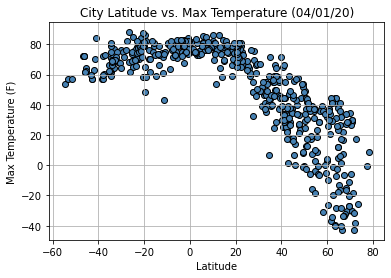

In [16]:
plt.scatter(weather_df["Lat"], weather_df["MaxTemp"], facecolors="steelblue", edgecolors="black")
plt.title("City Latitude vs. Max Temperature (04/01/20)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.savefig('views/Lat_vs_Temp.png')

## Latitude vs. Humidity Plot

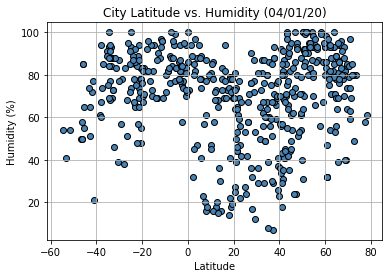

In [17]:
plt.scatter(weather_df["Lat"], weather_df["Humidity"], facecolors="steelblue", edgecolors="black")
plt.title("City Latitude vs. Humidity (04/01/20)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.savefig('views/Lat_vs_Humidity.png')

## Latitude vs. Cloudiness Plot

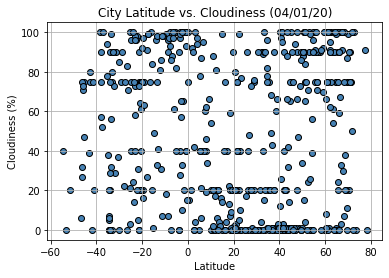

In [18]:
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"], facecolors="steelblue", edgecolors="black")
plt.title("City Latitude vs. Cloudiness (04/01/20)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.savefig('views/Lat_vs_Cloud.png')

## Latitude vs. Wind Speed Plot

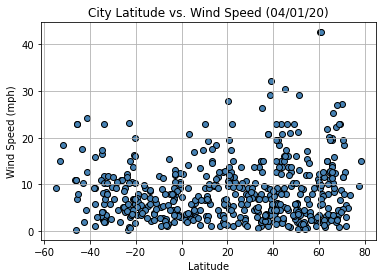

In [19]:
plt.scatter(weather_df["Lat"], weather_df["WindSpeed"], facecolors="steelblue", edgecolors="black")
plt.title("City Latitude vs. Wind Speed (04/01/20)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.savefig('views/Lat_vs_WindSpeed.png')

## Linear Regression

In [20]:
#Negative latitude is south.
southgroup = weather_df.loc[weather_df["Lat"] <= 0]
southgroup

,Lat,Lng,MaxTemp,Humidity,Cloudiness,WindSpeed,Country,Date
0,-21.2078,-159.7750,84.20,74,75,6.91,CK,1614726494
3,-23.1203,-134.9692,78.04,66,58,0.94,PF,1614726495
5,-33.6500,115.3333,69.01,84,99,3.00,AU,1614726402
7,-20.4597,-66.8250,58.14,48,61,19.98,BO,1614726496
10,-2.7333,36.6833,67.87,58,33,7.81,TZ,1614726498
...,...,...,...,...,...,...,...,...
500,-29.9533,-71.3436,64.40,77,0,11.50,CL,1614726748
507,-3.9839,-38.7273,82.99,78,0,8.05,BR,1614726781
510,-11.3167,-75.6167,43.48,96,98,4.83,PE,1614726782
518,-20.2333,164.0167,81.79,76,92,15.99,NC,1614726787


In [21]:
northgroup = weather_df.loc[weather_df["Lat"] >= 0]
northgroup

,Lat,Lng,MaxTemp,Humidity,Cloudiness,WindSpeed,Country,Date
1,60.3778,92.6267,-26.34,98,8,1.97,RU,1614726494
2,45.5234,-122.6762,55.99,54,75,8.05,US,1614726425
4,0.5333,72.9333,81.81,73,15,12.19,MV,1614726495
6,42.6001,-73.9662,23.00,41,0,8.48,US,1614726300
8,69.4541,-133.0374,-11.20,64,75,4.61,CA,1614726497
...,...,...,...,...,...,...,...,...
515,56.5419,21.0367,28.40,93,75,2.30,LV,1614726785
516,7.9745,123.7458,76.26,87,19,1.23,PH,1614726786
517,13.2154,18.3353,78.46,15,0,17.60,TD,1614726786
519,28.6803,121.4428,46.00,87,76,1.01,CN,1614726787


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.832363243027896


DEBUG:matplotlib.font_manager:findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=15.0.
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXSizeThreeSym' (STIXSizThreeSymBol.ttf) normal normal 700 normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXSizeFourSym' (STIXSizFourSymReg.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'cmsy10' (cmsy10.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXNonUnicode' (STIXNonUniBolIta.ttf) italic normal 700 normal>) = 11.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXGeneral' (STIXGeneralBolIta.ttf) italic normal 700 normal>) = 11.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono-Oblique.ttf) oblique normal 400 n

DEBUG:matplotlib.font_manager:findfont: score(<Font 'Tempus Sans ITC' (TEMPSITC.TTF) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Yu Gothic' (YuGothM.ttc) normal normal 500 normal>) = 10.145
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Bodoni MT' (BOD_BLAI.TTF) italic normal 900 normal>) = 11.525
DEBUG:matplotlib.font_manager:findfont: score(<Font 'FangSong' (simfang.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Monotype Corsiva' (MTCORSVA.TTF) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Bodoni MT' (BOD_I.TTF) italic normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Georgia' (georgiaz.ttf) italic normal 700 normal>) = 11.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Century Gothic' (GOTHIC.TTF) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'FangSong' (simfang.ttf) 

DEBUG:matplotlib.font_manager:findfont: score(<Font 'Lucida Bright' (LBRITEI.TTF) italic normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'French Script MT' (FRSCRIPT.TTF) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Kristen ITC' (ITCKRIST.TTF) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Comic Sans MS' (comici.ttf) italic normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Lucida Bright' (LBRITEI.TTF) italic normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Berlin Sans FB' (BRLNSB.TTF) normal normal 700 normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Bahnschrift' (bahnschrift.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Microsoft JhengHei' (msjhbd.ttc) normal normal 700 normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'A

DEBUG:matplotlib.font_manager:findfont: score(<Font 'Book Antiqua' (ANTQUABI.TTF) italic normal 700 normal>) = 11.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Bell MT' (BELLI.TTF) italic normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Perpetua' (PER_____.TTF) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Arial' (ARIALNI.TTF) italic normal 400 condensed>) = 7.613636363636363
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Microsoft Uighur' (MSUIGHUR.TTF) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Microsoft New Tai Lue' (ntailub.ttf) normal normal 700 normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Vladimir Script' (VLADIMIR.TTF) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Arial Rounded MT Bold' (ARLRDBD.TTF) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: scor

DEBUG:matplotlib.font_manager:findfont: score(<Font 'Verdana' (verdanab.ttf) normal normal 700 normal>) = 3.9713636363636367
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Myanmar Text' (mmrtextb.ttf) normal normal 700 normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Arial' (arial.ttf) normal normal 400 normal>) = 6.413636363636363
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Rockwell' (ROCKBI.TTF) italic normal 700 normal>) = 11.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Californian FB' (CALIFB.TTF) normal normal 700 normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Tw Cen MT Condensed' (TCCM____.TTF) normal normal 400 condensed>) = 10.25
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Corbel' (corbel.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Berlin Sans FB' (BRLNSB.TTF) normal normal 700 normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'S

DEBUG:matplotlib.font_manager:findfont: score(<Font 'Microsoft Yi Baiti' (msyi.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Eras Light ITC' (ERASLGHT.TTF) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Copperplate Gothic Bold' (COPRGTB.TTF) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Franklin Gothic Demi' (FRADMIT.TTF) italic normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Wingdings 3' (WINGDNG3.TTF) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Rage Italic' (RAGE.TTF) italic normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Tw Cen MT Condensed' (TCCB____.TTF) normal normal 700 condensed>) = 10.535
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Baskerville Old Face' (BASKVILL.TTF) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:

DEBUG:matplotlib.font_manager:findfont: score(<Font 'Segoe UI' (segoeuil.ttf) normal normal 300 normal>) = 10.145
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Bookman Old Style' (BOOKOSI.TTF) italic normal 300 normal>) = 11.145
DEBUG:matplotlib.font_manager:findfont: score(<Font 'HoloLens MDL2 Assets' (holomdl2.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Chiller' (CHILLER.TTF) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'SimSun-ExtB' (simsunb.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Microsoft New Tai Lue' (ntailub.ttf) normal normal 700 normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Sylfaen' (sylfaen.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Times New Roman' (timesbi.ttf) italic normal 700 normal>) = 11.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Bel

DEBUG:matplotlib.font_manager:findfont: score(<Font 'Georgia' (georgia.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Lucida Sans Typewriter' (LTYPE.TTF) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Bodoni MT' (BOD_PSTC.TTF) normal normal 300 normal>) = 10.145
DEBUG:matplotlib.font_manager:findfont: score(<Font 'KaiTi' (simkai.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Calibri' (calibrii.ttf) italic normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Modern No. 20' (MOD20.TTF) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Rockwell' (ROCKBI.TTF) italic normal 700 normal>) = 11.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Arial' (ARIALN.TTF) normal normal 400 condensed>) = 6.613636363636363
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Malgun Gothic' (malgunbd.tt

DEBUG:matplotlib.font_manager:findfont: score(<Font 'Yu Gothic' (YuGothB.ttc) normal normal 700 normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Lucida Bright' (LBRITEDI.TTF) italic normal 600 normal>) = 11.24
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Segoe Print' (segoeprb.ttf) normal normal 700 normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Candara' (Candarali.ttf) italic normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'SimSun' (simsun.ttc) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Segoe UI' (seguisli.ttf) italic normal 350 normal>) = 11.0975
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Microsoft Tai Le' (taile.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Comic Sans MS' (comicbd.ttf) normal normal 700 normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Sitka Small' (SitkaI.ttc)

DEBUG:matplotlib.font_manager:findfont: score(<Font 'Perpetua' (PERI____.TTF) italic normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Comic Sans MS' (comicz.ttf) italic normal 700 normal>) = 11.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Ebrima' (ebrima.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Microsoft Sans Serif' (micross.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Bodoni MT' (BOD_I.TTF) italic normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Segoe UI' (segoeuiz.ttf) italic normal 700 normal>) = 11.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Microsoft JhengHei' (msjhl.ttc) normal normal 290 normal>) = 10.1545
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Blackadder ITC' (ITCBLKAD.TTF) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Magneto' (MAGNETOB

DEBUG:matplotlib.font_manager:findfont: score(<Font 'Comic Sans MS' (comicz.ttf) italic normal 700 normal>) = 11.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Lucida Bright' (LBRITEDI.TTF) italic normal 600 normal>) = 11.24
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Franklin Gothic Medium Cond' (FRAMDCN.TTF) normal normal 400 condensed>) = 10.25
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Segoe UI' (seguisb.ttf) normal normal 600 normal>) = 10.24
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Tw Cen MT Condensed Extra Bold' (TCCEB.TTF) normal normal 400 condensed>) = 10.25
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Verdana' (verdanaz.ttf) italic normal 700 normal>) = 4.971363636363637
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Franklin Gothic Heavy' (FRAHV.TTF) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Century Schoolbook' (SCHLBKI.TTF) italic normal 400 normal>) = 11.05
DEBUG:matplotli

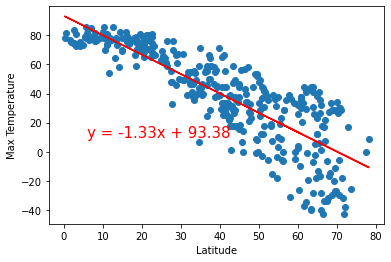

In [22]:
x_values = northgroup["Lat"]
y_values = northgroup["MaxTemp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
print(f"The r-value is: {rvalue}")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.4946500177566266


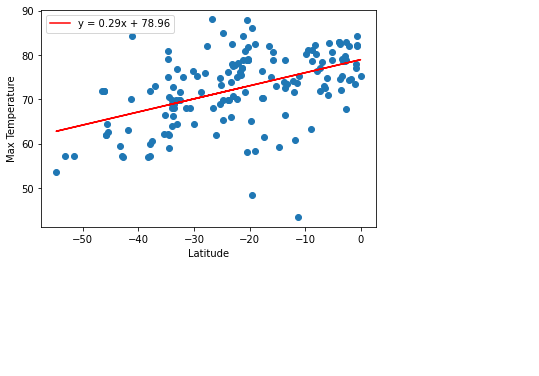

In [23]:
x_values = southgroup["Lat"]
y_values = southgroup["MaxTemp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values,"r-", label=line_eq)
plt.legend(loc='best')
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
print(f"The r-value is: {rvalue}")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.3094355233067901


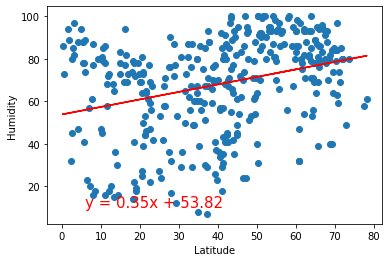

In [24]:
x_values = northgroup["Lat"]
y_values = northgroup["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(f"The r-value is: {rvalue}")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.3748334274962861


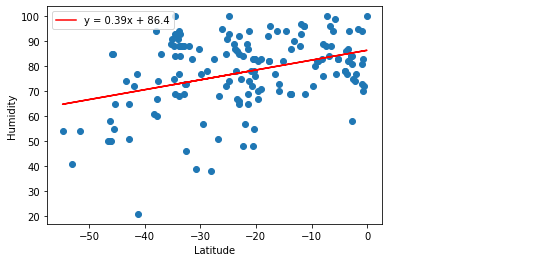

In [25]:
x_values = southgroup["Lat"]
y_values = southgroup["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values,"r-", label=line_eq)
plt.legend(loc='best')
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

print(f"The r-value is: {rvalue}")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [26]:
x_values = northgroup["Lat"]
y_values = northgroup["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Latitude")WindSpeed
plt.ylabel("Cloudiness")

print(f"The r-value is: {rvalue}")

SyntaxError: invalid syntax (<ipython-input-26-9e5c3bd65504>, line 10)

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [ ]:
x_values = southgroup["Lat"]
y_values = southgroup["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values,"r-", label=line_eq)
plt.legend(loc='best')
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

print(f"The r-value is: {rvalue}")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [ ]:
x_values = northgroup["Lat"]
y_values = northgroup["WindSpeed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

print(f"The r-value is: {rvalue}")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [ ]:
x_values = southgroup["Lat"]
y_values = southgroup["WindSpeed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values,"r-", label=line_eq)
plt.legend(loc='best')
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

print(f"The r-value is: {rvalue}")